# Multivariate Thinking 

## Limits of simple regression

Regression is not symmetric. Regression of A onto B is not the same as the regression of B onto A.

Multiple variables - Multiple regression
ols - ordinary leat squares is another name for regression

### Using StatsModels

Ols("y -> the one you want to predict. ~ ...")

In [4]:
import pandas as pd
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [10]:
brfss = pd.read_hdf("brfss.hdf5")
subset = brfss.dropna(subset=["INCOME2", "_VEGESU1"])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]
res = linregress(xs, ys)
print(res)

results = smf.ols("_VEGESU1 ~ INCOME2", data=brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


## Multiple regression

In [13]:
gss = pd.read_hdf("gss.hdf5")
results = smf.ols("realinc ~ educ", data=gss).fit()
print(results.params)
results = smf.ols("realinc ~ educ + age", data=gss).fit()
print(results.params)

Intercept   -11539.147837
educ          3586.523659
dtype: float64
Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


 The estimated slope for age is only about $80 per year, and it is surprisingly small.

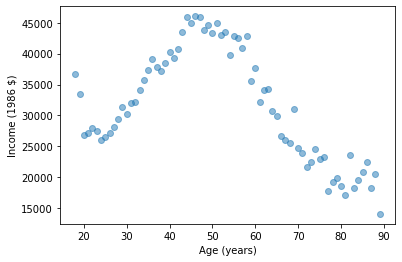

In [19]:
import matplotlib.pyplot as plt
grouped = gss.groupby("age")
mean_income_by_age = grouped["realinc"].mean()
plt.plot(mean_income_by_age, "o", alpha=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Income (1986 $)")
plt.show()

Slope is so small because the relationship is non-linear. So multiple regression can be used. To describe a non-linear relationship a new variable that is non-linear combination of other variables can be added.

In [21]:
gss["age2"] = gss["age"] ** 2
model = smf.ols("realinc ~ educ + age + age2", data = gss)
results= model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

### Plot income and education

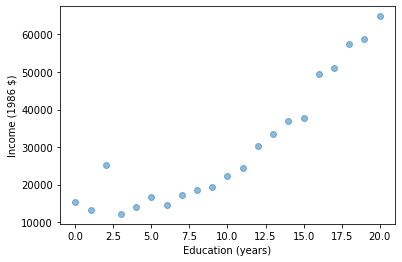

In [24]:
grouped = gss.groupby("educ")
mean_income_by_educ = grouped["realinc"].mean()
plt.plot(mean_income_by_educ, "o", alpha=0.5)
plt.xlabel("Education (years)")
plt.ylabel("Income (1986 $)")
plt.show()

### Non-linear model of education

In [79]:
gss["educ2"] = gss["educ"] ** 2
results = smf.ols("realinc ~ educ + educ2 + age + age2", data = gss).fit()
print(results.params)


Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Visualizing regression results

The regression results object provides a method called predict(), that uses the model to generate predictions.

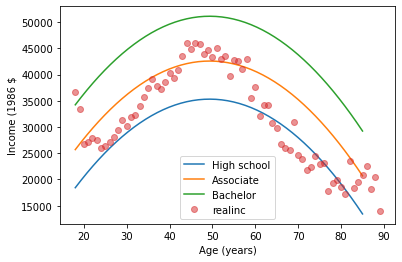

In [84]:
import numpy as np
df = pd.DataFrame()
df["age"] = np.linspace(18, 85)
df["age2"] = df["age"] ** 2
df["educ"] = 12
df["educ2"] = df["educ"] ** 2 
pred12 = results.predict(df)

df["educ"] = 14
df["educ2"] = df["educ"] ** 2 
pred14 = results.predict(df)

df["educ"] = 16
df["educ2"] = df["educ"] ** 2 
pred16 = results.predict(df)

plt.plot(df["age"], pred12, label="High school")
plt.plot(df["age"], pred14, label="Associate")
plt.plot(df["age"], pred16, label="Bachelor")

plt.plot(mean_income_by_age, "o", alpha=0.5, label = "realinc")
plt.xlabel("Age (years)")
plt.ylabel("Income (1986 $")
plt.legend()
plt.show()

The lines show the predictions generated by the model, holding education constant.
They are predicted as a function of age for three levels of education.
This visualization helps validate the model by comparing the predictions with the data.
And the contributions of the age and education can be seen.

### Making predictions

In [124]:
result = smf.ols("realinc ~ educ + educ2 + age + age2", data=gss).fit()
df2 = pd.DataFrame()
df2["educ"] = np.linspace(0,20)
df2["age"] = 30
df2["educ2"] = df2["educ"] ** 2
df2["age2"] = df2["age"] ** 2
pred = result.predict(df2)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### Visualizing predictions

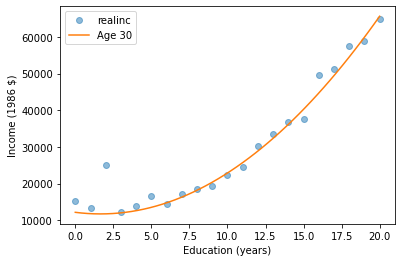

In [125]:
grouped = gss.groupby("educ")
mean_income_by_educ = grouped["realinc"].mean()

plt.plot(mean_income_by_educ, "o", alpha=0.5, label="realinc")
plt.plot(df2["educ"], pred, label = "Age 30")
plt.xlabel("Education (years)")
plt.ylabel("Income (1986 $)")
plt.legend()
plt.show()

So this model captures the relationship and can be used to estimate things.

## Logistic regression

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


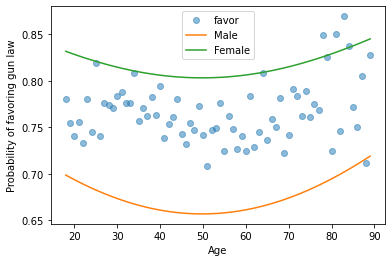

In [141]:
# gss["gunlaw"].replace([2], 0, inplace=True) 
formula = "gunlaw ~ educ + educ2 + age + age2 + C(sex)"
results = smf.logit(formula, data=gss).fit()
df = pd.DataFrame()
df["age"] = np.linspace(18, 89)
df["educ"] = 12
df["age2"] = df["age"] ** 2
df["educ2"] = df["educ"] ** 2
df["sex"] = 1
pred1 = results.predict(df)
df["sex"] = 2
pred2 = results.predict(df)

grouped = gss.groupby("age")
favor_by_age = grouped["gunlaw"].mean()
plt.plot(favor_by_age, "o", alpha =0.5, label="favor")

plt.plot(df["age"], pred1, label="Male")
plt.plot(df["age"], pred2, label="Female")

plt.xlabel("Age")
plt.ylabel("Probability of favoring gun law")
plt.legend()
plt.show()

Predictions for different ages and sexes with education held constant.

### Predicting a binary variable

To predict a binart variable logit is used.

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


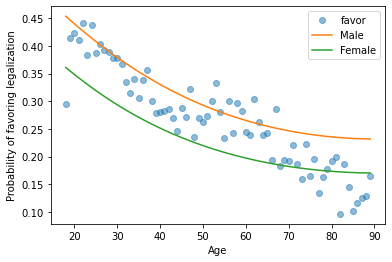

In [150]:
gss["grass"].replace(2, 0, inplace=True)
results = smf.logit("grass ~ age + age2 + educ + educ2 + C(sex)", data=gss).fit()
df = pd.DataFrame()
df["age"] = np.linspace(18, 89)
df["age2"] = df["age"] ** 2
df["educ"] = 12
df["educ2"] = df["educ"] ** 2
df["sex"] = 1
pred1 = results.predict(df)
df["sex"] = 2
pred2 = results.predict(df)

grouped = gss.groupby("age")
favor_by_age = grouped["grass"].mean()
plt.plot(favor_by_age, "o", alpha=0.5, label="favor")

plt.plot(df["age"], pred1, label="Male")
plt.plot(df["age"], pred2, label="Female")

plt.xlabel("Age")
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

Alwats look at a visualization before computing correlation or simple regression.